# COMSW4995_007_2018_3 Elements of Data Science 
# Homework 1 Solution

### Due: 9pm Oct. 4

In this homework we practice loading and transforming data.  
We'll also practice calculating summary statistics and a few visualizations.

## Instructions

Follow the comments below and fill in the blanks (\_\_\_\_) to complete.

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# tell jupyter to display images in the notebook
%matplotlib inline

# for pretty printing
import pprint

# To suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# To increase the number of rows pandas will print before truncation
pd.set_option('display.max_rows', 500)

# To increase the number of columns pandas will print before truncation
pd.set_option('display.max_columns', 100)

# To increase the width of each column pandas will print before truncating.
pd.set_option('display.max_colwidth',100)

---

## Part 1: College Football Dataset and total_score

Fall is college football season, so we'll first look at some data from the 2017 college football season.  
This data was gathered from 'http://sports.snoozle.net/'.

We'd like to find the total score for each game and the min, max and mean of the total scores.

In this dataset, each row contains information about a single game, visiting team info followed by home team.  
We'll need to combine two columns to find the total number of points.

This csv contains columns with duplicate names.
When there are columns with identical names, pandas attaches a suffix to discriminate them.  
All 'Home Team' columns will have a '.1' suffix.

In [2]:
# Load the data from ../data/cfb_2017.csv into the variable df_cfb
df_cfb = pd.read_csv('../../data/cfb_2017.csv')

In [3]:
# Print the first 3 rows of the dataset using head
df_cfb.head(3)

,Date,Vis Team,Rushing Yards,Rushing Attempts,Passing Yards,Passing Attempts,Passing Completions,Penalties,Penalty Yards,Fumbles Lost,Interceptions Thrown,1st Downs,3rd Down Attempts,3rd Down Conversions,4th Down Attempts,4th Down conversions,Time of Possession,Score,Home Team,Rushing Yards.1,Rushing Attempts.1,Passing Yards.1,Passing Attempts.1,Passing Completions.1,Penalties.1,Penalty Yards.1,Fumbles Lost.1,Interceptions Thrown.1,1st Downs.1,3rd Down Attempts.1,3rd Down Conversions.1,4th Down Attempts.1,4th Down conversions.1,Time of Possession.1,Score.1
0,2017-08-26,Portland State,86,36,134,36,16,7,70,0,1,14,19,7,4,2,1821,6,BYU,171,35,194,27,16,7,70,0,0,13,13,4,1,0,1779,20
1,2017-08-26,USF,315,74,233,26,13,10,57,0,0,29,19,3,3,3,2190,42,San Jose State,109,38,278,50,25,9,64,0,3,18,21,7,2,1,1410,22
2,2017-08-26,Oregon State,152,29,304,47,27,3,21,2,3,23,16,10,0,0,1541,27,Colorado State,191,43,334,39,26,8,40,1,1,31,14,8,1,1,2059,58


In [4]:
# print out information about the dataframe using .info()
df_cfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
Date                      999 non-null object
Vis Team                  999 non-null object
Rushing Yards             999 non-null int64
Rushing Attempts          999 non-null int64
Passing Yards             999 non-null int64
Passing Attempts          999 non-null int64
Passing Completions       999 non-null int64
Penalties                 999 non-null int64
Penalty Yards             999 non-null int64
Fumbles Lost              999 non-null int64
Interceptions Thrown      999 non-null int64
1st Downs                 999 non-null int64
3rd Down Attempts         999 non-null int64
3rd Down Conversions      999 non-null int64
4th Down Attempts         999 non-null int64
4th Down conversions      999 non-null int64
Time of Possession        999 non-null int64
Score                     999 non-null int64
Home Team                 999 non-null object
Rushing Yards.1           999 non-nul

In [5]:
# How may records are in the dataset?
print('dataframe has {} records'.format(len(df_cfb)))

dataframe has 999 records


In [6]:
# How many values are missing from the Score and Score.1 columns?
print('there are {} missing scores'.format(sum(df_cfb.Score.isnull())+sum(df_cfb.loc[:,'Score.1'].isnull())))

there are 0 missing scores


In [7]:
# What is the average (mean) score for visiting teams?
print('the mean visiting team score is {:0.2f}'.format(df_cfb.Score.mean()))

the mean visiting team score is 24.87


In [8]:
# To examine the total score, we need to combine Score and Score.1
# Create a new column called 'total_score' which is the sum of the 'Score' and 'Score.1' columns
df_cfb['total_score'] = df_cfb.Score + df_cfb['Score.1']

In [9]:
# What is the average (mean) total score?
print('the mean total score is {:0.2f}'.format(df_cfb.total_score.mean()))

the mean total score is 55.98


In [10]:
# Use .describe to show other values associated with total score
df_cfb.total_score.describe()

count    999.000000
mean      55.977978
std       18.671603
min        6.000000
25%       43.000000
50%       55.000000
75%       67.000000
max      139.000000
Name: total_score, dtype: float64

In [11]:
# what are the min and max values for total_score?
print('the minimum and maximum values are {} and {}'.format(6,139))

the minimum and maximum values are 6 and 139


In [12]:
# What were the team names and team scores for the game with the highest total score?
# We should see a single row with the columns: Vis Team, Score, Home Team, Score.1
df_cfb[df_cfb.total_score == df_cfb.total_score.max()][['Vis Team','Score','Home Team','Score.1']]

,Vis Team,Score,Home Team,Score.1
354,W Michigan,71,Buffalo,68


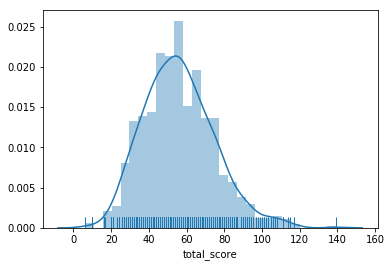

In [13]:
# Use seaborn distplot to plot the distribution of total_score
# Turn on rug to show each game's total score
_ = sns.distplot(df_cfb.total_score, rug=True)

---

## Part 2: World Bank Data

This data is provided by World Bank Open Data https://data.worldbank.org/.

It includes many country data indicators sampled over time.

There are two files we are interested in:
1. WDICountry.csv includes country and region information, one country or region per row.
2. WDIData.csv includes indicator data, one row per country and indicator.

We would like to be able to analyze a few indicators for countries grouped by region.  
To do that we will need to clean and join the two sets of records.

---

### Part 2a: Munge WDICountry

In [14]:
# Read Country information from '../data/WDICountry.csv' into df_country
# print the number of rows in df_country
df_country = pd.read_csv('../../data/WDICountry.csv')
print('df_country has {} rows'.format(len(df_country)))

df_country has 263 rows


In [15]:
# Print the first 3 rows of WDICountry
df_country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databa...,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2015.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,"Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimat...",South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2011",NaN,NaN,NaN,2015.0,2000.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-GDDS),2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2015.0,2005.0,NaN


In [16]:
# Using .columns, how many columns does WDICountry have?
print('df_country has {} columns'.format(len(df_country.columns)))

df_country has 32 columns


In [17]:
# We'll only keep a few columns: ['Country Code','Short Name','Region','Income Group']
# Overwrite df_country with a new dataframe containing only these columns
# Print out the statement 'df_country has {} columns' using .format to confirm that there are only 4 columns
df_country = df_country.loc[:,['Country Code','Short Name','Region','Income Group']]
print('df_country has {} columns'.format(df_country.shape[1]))

df_country has 4 columns


In [18]:
# Examine df_country using .info
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 4 columns):
Country Code    263 non-null object
Short Name      263 non-null object
Region          217 non-null object
Income Group    217 non-null object
dtypes: object(4)
memory usage: 8.3+ KB


In [19]:
# There are some rows with missing Region and Income Group.
# Print out both the number and proportion of rows with missing Region information
n_missing = sum(df_country.Region.isnull())
prop_missing = n_missing / len(df_country)
print('there are {:} rows with missing data, {:0.2} of the dataset'.format(n_missing,prop_missing))

there are 46 rows with missing data, 0.17 of the dataset


In [20]:
# Drop the rows of df_country with any null values (using inplace=True)
# Use .info to make sure there a no longer null values
df_country.dropna(inplace=True)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 262
Data columns (total 4 columns):
Country Code    217 non-null object
Short Name      217 non-null object
Region          217 non-null object
Income Group    217 non-null object
dtypes: object(4)
memory usage: 8.5+ KB


In [21]:
# Each row of df_country should be a separate country
# Assert that there are no duplicates (use len and drop_duplicates)
# hint: df_country should be the same length before and after dropping duplicate rows
assert len(df_country.drop_duplicates()) == len(df_country)

In [22]:
# Assert that 'Country Code' is unique (use len and unique)
# hist: the number of unique country codes should be the same length as the dataframe
assert len(df_country.loc[:,'Country Code'].unique()) == len(df_country)

In [23]:
# Set the index of df_country to be 'Country Code' (inplace) and display the first 5 rows
df_country.set_index('Country Code', inplace=True)
df_country.head()

,Short Name,Region,Income Group
Country Code,,,
ABW,Aruba,Latin America & Caribbean,High income
AFG,Afghanistan,South Asia,Low income
AGO,Angola,Sub-Saharan Africa,Lower middle income
ALB,Albania,Europe & Central Asia,Upper middle income
AND,Andorra,Europe & Central Asia,High income


---

### Part 2b: Munge WDIData

In [24]:
# Now we'll load the other country data we're interested in.
# Read csv '../data/WDIData.csv.zip' into df_data
# Note: 
#  Since this file is large it is stored as a zip.
#  You don't need to decompress the zip file first, pandas will handle this for you.
df_data = pd.read_csv('../../data/WDIData.csv.zip')

In [25]:
# Display .info for df_data
# Note that the data is in long format instead of wide format
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401016 entries, 0 to 401015
Data columns (total 62 columns):
Country Name      401016 non-null object
Country Code      401016 non-null object
Indicator Name    401016 non-null object
Indicator Code    401016 non-null object
1960              34646 non-null float64
1961              38504 non-null float64
1962              40438 non-null float64
1963              40738 non-null float64
1964              41260 non-null float64
1965              44146 non-null float64
1966              43808 non-null float64
1967              45298 non-null float64
1968              45143 non-null float64
1969              46858 non-null float64
1970              79998 non-null float64
1971              86577 non-null float64
1972              89660 non-null float64
1973              89423 non-null float64
1974              90945 non-null float64
1975              95139 non-null float64
1976              97554 non-null float64
1977              101394 non

In [26]:
# Use pprint.pprint to print a list of the unique values in Indicator Name
# These are all of the available data points in this file, which is why it's so large.
# (to see the difference, try using the standard 'print' first)
pprint.pprint(list(df_data.loc[:,'Indicator Name'].unique()))

['2005 PPP conversion factor, GDP (LCU per international $)',
 '2005 PPP conversion factor, private consumption (LCU per international $)',
 'Access to clean fuels and technologies for cooking  (% of population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account (% age 15+) [ts]',
 'Account at a financial institution (% age 15+)',
 'Account at a financial institution, female (% age 15+)',
 'Account at a financial institution, income, poorest 40% (% ages 15+)',
 'Account at a financial institution, income, richest 60% (% ages 15+)',
 'Account at a financial institution, male (% age 15+)',
 'Account, female (% age 15+) [ts]',
 'Account, income, poorest 40% (% ages 15+) [ts]',
 'Account, income, richest 60% (% ages 15+) [ts]',
 'Account, male (% age 15+) [ts]',
 'Account, older adults (% ages 25+) [ts]',
 'Account, primary education or less (% ages 15+) [ts]',
 'Account, 

 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Merchandise exports (current US$)',
 'Merchandise exports by the reporting economy (current US$)',
 'Merchandise exports by the reporting economy, residual (% of total '
 'merchandise exports)',
 'Merchandise exports to economies in the Arab World (% of total merchandise '
 'exports)',
 'Merchandise exports to high-income economies (% of total merchandise '
 'exports)',
 'Merchandise exports to low- and middle-income economies in East Asia & '
 'Pacific (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies in Europe & Central '
 'Asia (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies in Latin America & '
 'the Caribbean (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies in Middle East & '
 'North Africa (% of total me

 'Prevalence of underweight, weight for age (% of children under 5)',
 'Prevalence of underweight, weight for age, female (% of children under 5)',
 'Prevalence of underweight, weight for age, male (% of children under 5)',
 'Prevalence of wasting, weight for height (% of children under 5)',
 'Prevalence of wasting, weight for height, female (% of children under 5)',
 'Prevalence of wasting, weight for height, male (% of children under 5)',
 'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
 'Primary completion rate, female (% of relevant age group)',
 'Primary completion rate, male (% of relevant age group)',
 'Primary completion rate, total (% of relevant age group)',
 'Primary education, duration (years)',
 'Primary education, pupils',
 'Primary education, pupils (% female)',
 'Primary education, teachers',
 'Primary education, teachers (% female)',
 'Primary income on FDI, payments (current US$)',
 'Primary income payments (BoP, current US$)',
 'Primary in

In [27]:
# We'll only keep a few of these indicators.
# Create a list of indicators to keep that includes these indicators:
# 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)','GDP (constant 2010 US$)','Population, total','Population density (people per sq. km of land area)','Unemployment, total (% of total labor force) (national estimate)'
data_indicators_to_keep = ['Employment to population ratio, 15+, female (%) (modeled ILO estimate)','GDP (constant 2010 US$)','Population, total','Population density (people per sq. km of land area)','Unemployment, total (% of total labor force) (national estimate)']

In [28]:
# The columns of WIData contain information for each year.
# We'll look at only year 2016
# Create a list of columns to keep that includes these columns:
# 'Country Code','Indicator Name','2016'
data_columns_to_keep = ['Country Code','Indicator Name','2016']

In [29]:
# Overwrite df_data witha dataframe containing only: 
#  the rows whose 'Indicator Name' is in data_indicators_to_keep (use .isin) and 
#  the columns in data_columns_to_keep
df_data = df_data.loc[df_data['Indicator Name'].isin(data_indicators_to_keep),data_columns_to_keep]

In [30]:
# Display the first 5 rows of df_data
df_data.head()

,Country Code,Indicator Name,2016
413,ARB,"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",1.810083e+01
508,ARB,GDP (constant 2010 US$),2.617570e+12
1075,ARB,Population density (people per sq. km of land area),2.983925e+01
1084,ARB,"Population, total",4.064527e+08
1480,ARB,"Unemployment, total (% of total labor force) (national estimate)",NaN


In [31]:
# Into df_data_pivot, pivot df_data with index 'Country Code', columns 'Indicator Name' and values '2016'
# Display the first 5 rows of df_data_pivot
df_data_pivot = df_data.pivot(index='Country Code',columns='Indicator Name',values='2016')
df_data_pivot.head()

Indicator Name,"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",GDP (constant 2010 US$),Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (national estimate)"
Country Code,,,,,
ABW,NaN,NaN,582.344444,104822.0,NaN
AFG,16.819000,2.066392e+10,53.083405,34656032.0,NaN
AGO,55.590000,1.039199e+11,23.111786,28813463.0,NaN
ALB,33.776001,1.355215e+10,104.967190,2876101.0,NaN
AND,NaN,NaN,164.427660,77281.0,NaN


---

### Part 2c: Join the two datasets

In [32]:
# Importantly, df_country and df_data_pivot now have the the same index values.
# To see this, use .index to print out the first 5 index values in df_country and df_data
print(df_country.index[:5])
print(df_data_pivot.index[:5])

Index(['ABW', 'AFG', 'AGO', 'ALB', 'AND'], dtype='object', name='Country Code')
Index(['ABW', 'AFG', 'AGO', 'ALB', 'AND'], dtype='object', name='Country Code')


In [33]:
# Into df_wdi put the inner join of df_country with df_data_pivot using .join
# Display the first 5 rows
df_wdi = df_country.join(df_data_pivot, how='inner')
df_wdi.head()

,Short Name,Region,Income Group,"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",GDP (constant 2010 US$),Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (national estimate)"
Country Code,,,,,,,,
ABW,Aruba,Latin America & Caribbean,High income,NaN,NaN,582.344444,104822.0,NaN
AFG,Afghanistan,South Asia,Low income,16.819000,2.066392e+10,53.083405,34656032.0,NaN
AGO,Angola,Sub-Saharan Africa,Lower middle income,55.590000,1.039199e+11,23.111786,28813463.0,NaN
ALB,Albania,Europe & Central Asia,Upper middle income,33.776001,1.355215e+10,104.967190,2876101.0,NaN
AND,Andorra,Europe & Central Asia,High income,NaN,NaN,164.427660,77281.0,NaN


In [34]:
# Assert that the number of rows matches the number of unique 'Short Name'
assert len(df_wdi) == len(df_wdi.loc[:,'Short Name'].unique())

---

### Part 2d: Analysis and Visualization

In [35]:
# Display the number of countries per region seen in df_wdi (use .value_counts)
df_wdi['Region'].value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [36]:
# What proportion of our dataset is made up by each region?
# Hint: Divide the previous counts by the number of rows.
df_wdi['Region'].value_counts() / len(df_wdi)

Europe & Central Asia         0.267281
Sub-Saharan Africa            0.221198
Latin America & Caribbean     0.193548
East Asia & Pacific           0.170507
Middle East & North Africa    0.096774
South Asia                    0.036866
North America                 0.013825
Name: Region, dtype: float64

In [37]:
# Display the summary stats (means and quartiles) for 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)'
df_wdi['Employment to population ratio, 15+, female (%) (modeled ILO estimate)'].describe()

count    186.000000
mean      47.462634
std       16.062377
min        8.228000
25%       38.205749
50%       47.550499
75%       56.925750
max       84.007004
Name: Employment to population ratio, 15+, female (%) (modeled ILO estimate), dtype: float64

In [38]:
# Let's rename that column to something shorter.
# Use .rename to rename 
#  'Employment to population ratio, 15+, female (%) (modeled ILO estimate)' 
#  to 
#  'Female Employment Ratio'
# Display the columns to confirm.
df_wdi.rename({'Employment to population ratio, 15+, female (%) (modeled ILO estimate)':'Female Employment To Population Ratio'},
              axis='columns',
              inplace=True
             )
df_wdi.columns

Index(['Short Name', 'Region', 'Income Group',
       'Female Employment To Population Ratio', 'GDP (constant 2010 US$)',
       'Population density (people per sq. km of land area)',
       'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)'],
      dtype='object')

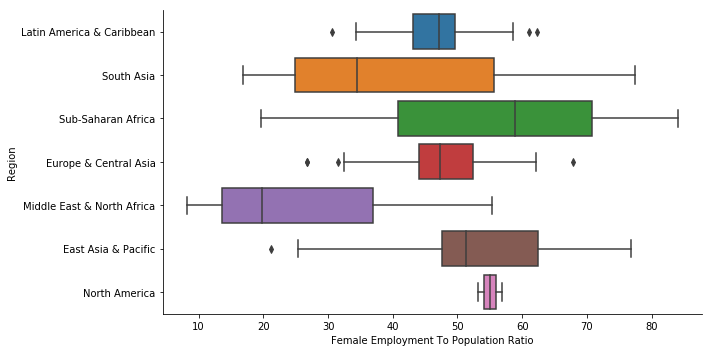

In [39]:
# Use seaborn .catplot to display box plots of 'Female Employment to Population Ratio' for each Region
# Since the region names are long, we'll use horizontal box plots.
# Put 'Female Employment To Population Ratio' on the x-axis and 'Region' on the y-axis.
# Set 'aspect' to 2 to widen the plot
_ = sns.catplot(x='Female Employment To Population Ratio',
                y='Region',
                data=df_wdi,
                kind='box',
                aspect=2
               )